# Review data analysis

In [33]:
from db import Review, App
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
import pandas as pd
%matplotlib inline  

In [11]:
engine = create_engine('sqlite:///reviews.db')
Base = declarative_base()
Base.metadata.bind = engine
DBSession = sessionmaker(bind=engine)
session = DBSession()

### Apps investigated:

In [38]:
apps = [a.title for a in session.query(App).all()]
apps

['Hoop - New friends on Snapchat',
 'Yubo – Join, play, Make new friends online',
 'Wink - find & make new snapchat friends',
 'Add friends on Snapchat , KIK & Instagram',
 'F3 - Make new friends, Anonymous questions, Chat',
 'Sugar Daddy & Sugar Baby Dating App - SeekingDaddy',
 'Teenage Chat & Dating',
 'Free dating app & chat for young adults & teens',
 'Teen Chat Rooms',
 'Kids Chat Rooms',
 'Find Me A Freak Free Online Dating App for singles',
 'Free Kids Chat Rooms',
 'Age Match - Older Men Younger Women Dating App',
 'Date-me - Free Dating',
 'SayHi Chat, Meet New People',
 'Free Dating App & Flirt Chat - Match with Singles',
 'Meetly - Free Dating App, flirt hookup Adult Meet',
 'DateMyAge™: Chat, Meet, Date Mature Singles Online',
 'Love me - Girls chat online',
 'Joyride – Dating Playground & Passionate Singles']

### Helper functions

In [20]:
def generate_keyword_db(keyword):
    data = []
    reviews_keyword = session.query(Review).filter(Review.content.contains(keyword)).all()
    for review in reviews_keyword:
        app_obj = session.query(App).filter(App.id == review.app_id).first()
        data.append({
            'app':app_obj.title,
            'content_rating':app_obj.content_rating,
            'installs':app_obj.installs,
            'review':review.content,
            'reply_content':review.reply_content
        })
    return pd.DataFrame(data)

In [39]:
def plot_app_counts_series(df):
    counts = df.groupby(['app']).size().sort_values(ascending=False)
    counts.plot(kind='bar')

## Reviews containing 'porn'

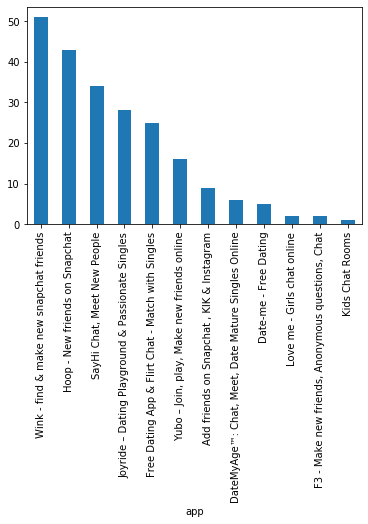

In [41]:
df = generate_keyword_db('porn')
plot_app_counts_series(df)

## Containing 'children'

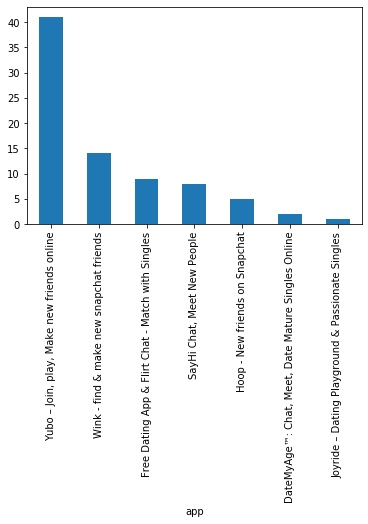

In [42]:
df = generate_keyword_db('children')
plot_app_counts_series(df)

## Containing 'sex'

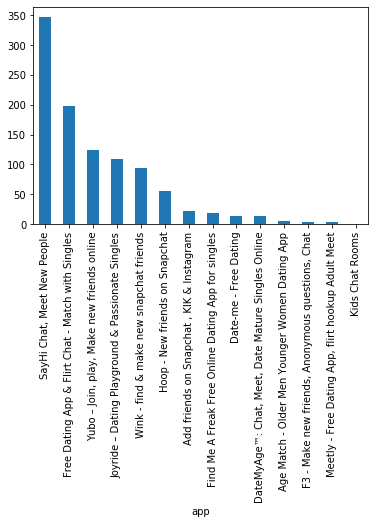

In [43]:
df = generate_keyword_db('sex')
plot_app_counts_series(df)

## Contaning 'creepy'

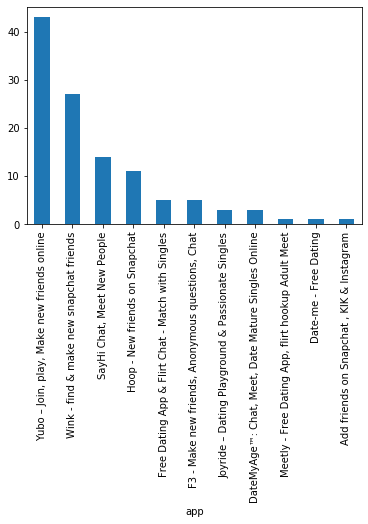

In [44]:
df = generate_keyword_db('creepy')
plot_app_counts_series(df)

## Containing 'dangerous'

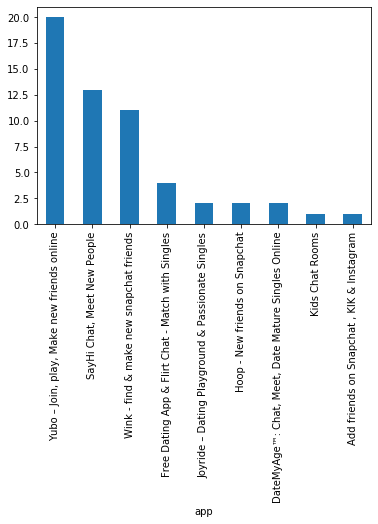

In [45]:
df = generate_keyword_db('dangerous')
plot_app_counts_series(df)